<a href="https://colab.research.google.com/github/Maxie503/CampusX-100Days-of-DL/blob/main/Day_54_Keras_Functional_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single input Multiple Output

In [1]:
 from keras.models import Model

In [2]:
from keras.layers import *
from keras.utils import plot_model

In [3]:
x = Input(shape=(3,))

h1 = Dense(128, activation='relu')(x)
h2 = Dense(64, activation='relu')(h1)

output1 = Dense(1,activation='linear')(h2)
output2 = Dense(1,activation='sigmoid')(h2)

In [4]:
m1 = Model(inputs=x,outputs=[output1,output2])

In [5]:
m1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │            512 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

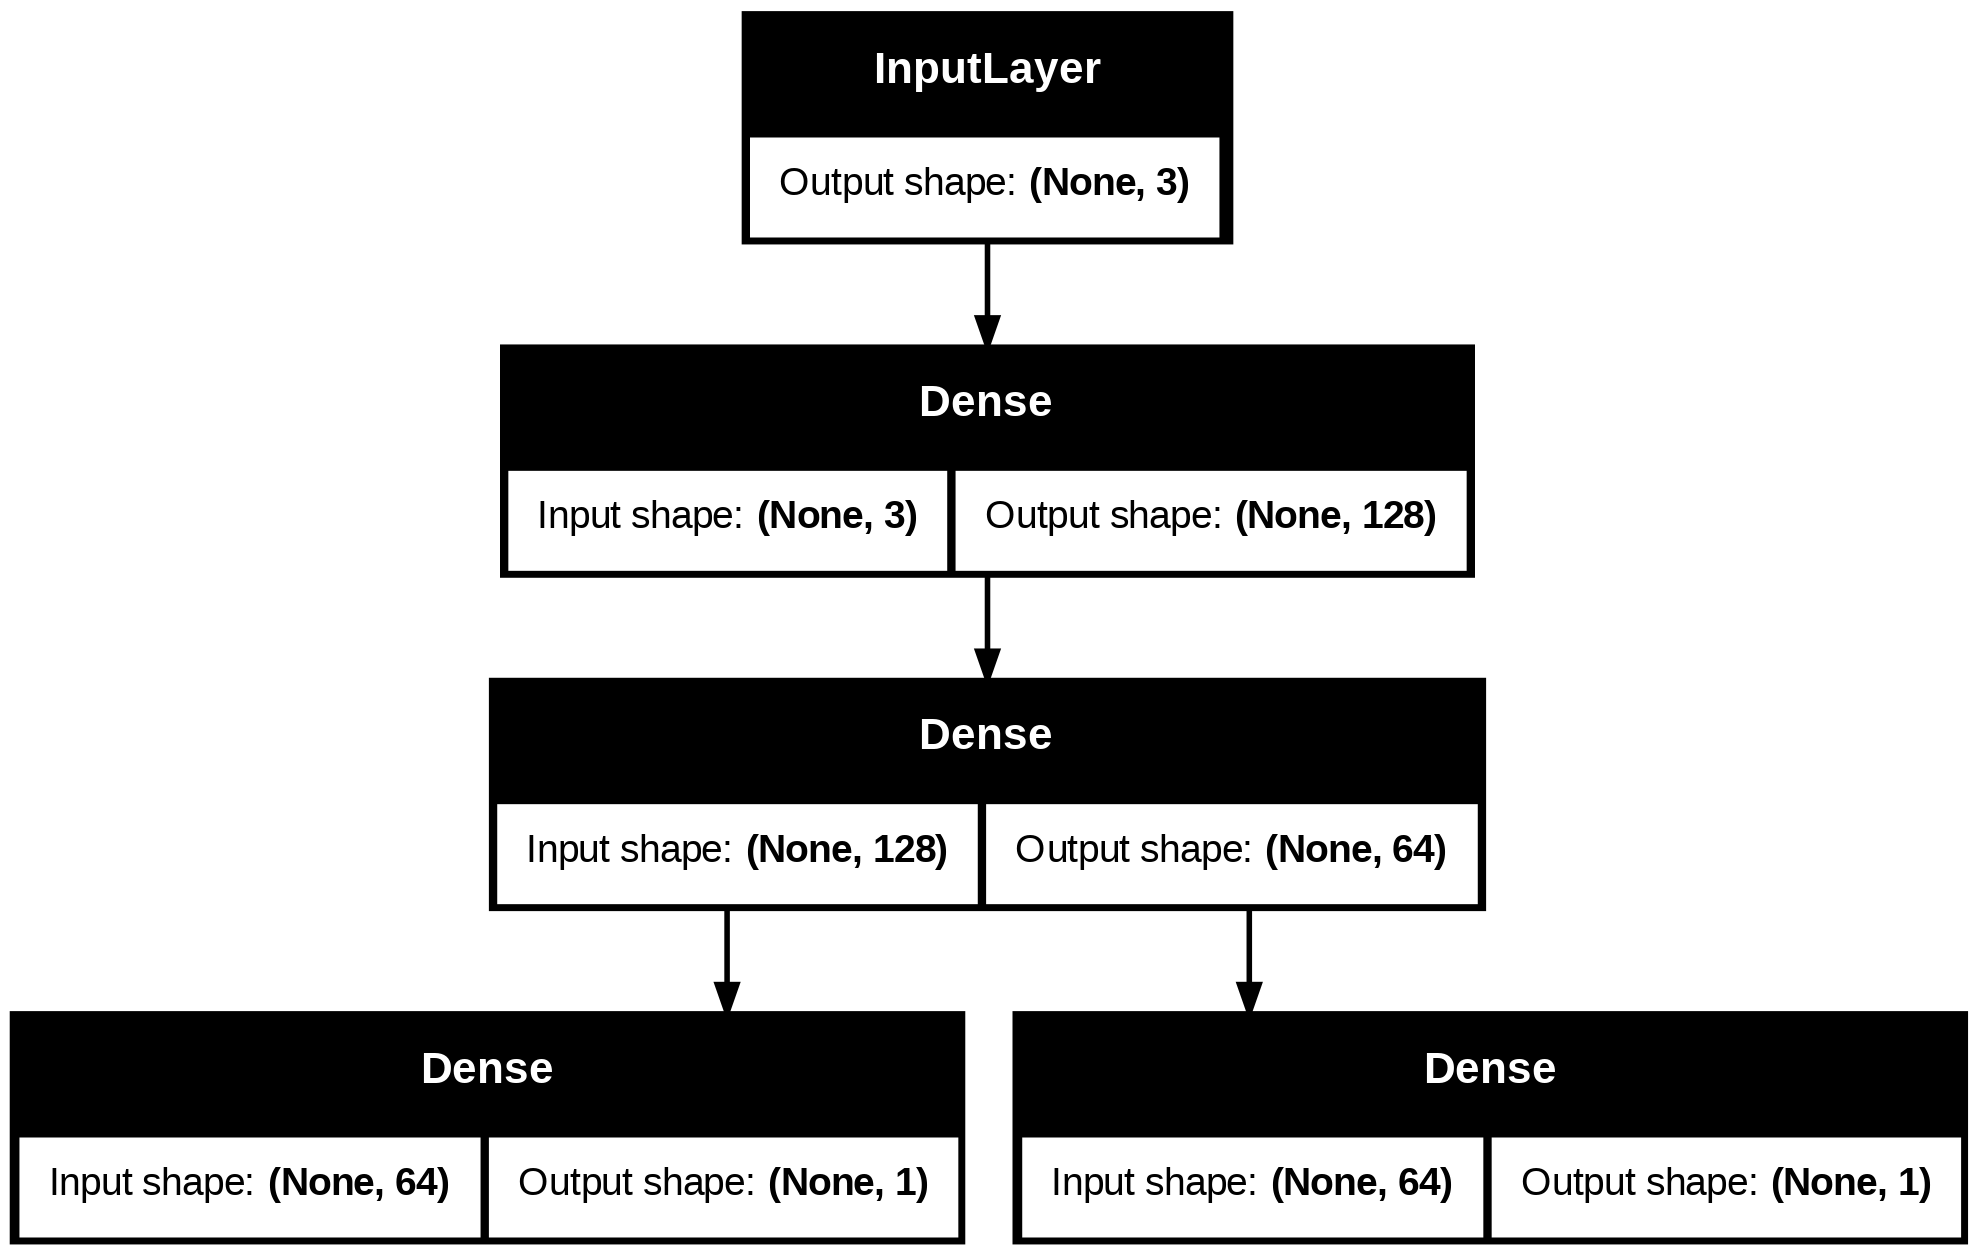

In [6]:
plot_model(m1,show_shapes=True)

# Muktiple Input Single Output

In [12]:
x1 = Input(shape=(128,))

x1h01 = Dense(64,activation='relu')(x1)
x1h02 = Dense(32,activation='relu')(x1h01)
x1h03 = Dense(4,activation='relu')(x1h02)

x2 = Input(shape=(32,))
x2h01 = Dense(8,activation='relu')(x2)
x2h02 = Dense(4,activation='relu')(x2h01)


In [13]:
combi = concatenate([x1h03,x2h02])

In [14]:
join = Dense(2, activation='relu')(combi)
output01 = Dense(1, activation='linear')(join)

In [15]:
m2 = Model(inputs=[x1,x2],outputs=output01)

In [16]:
m2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 64)             │          8,256 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 32)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 32)             │          2,080 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 8)              │            264 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 4)              │            132 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 4)              │             36 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 8)              │              0 │ dense_9[0][0],         │
│ (Concatenate)             │                        │                │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 2)              │             18 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 1)              │              3 │ dense_12[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,789 (42.14 KB)

 Trainable params: 10,789 (42.14 KB)

 Non-trainable params: 0 (0.00 B)

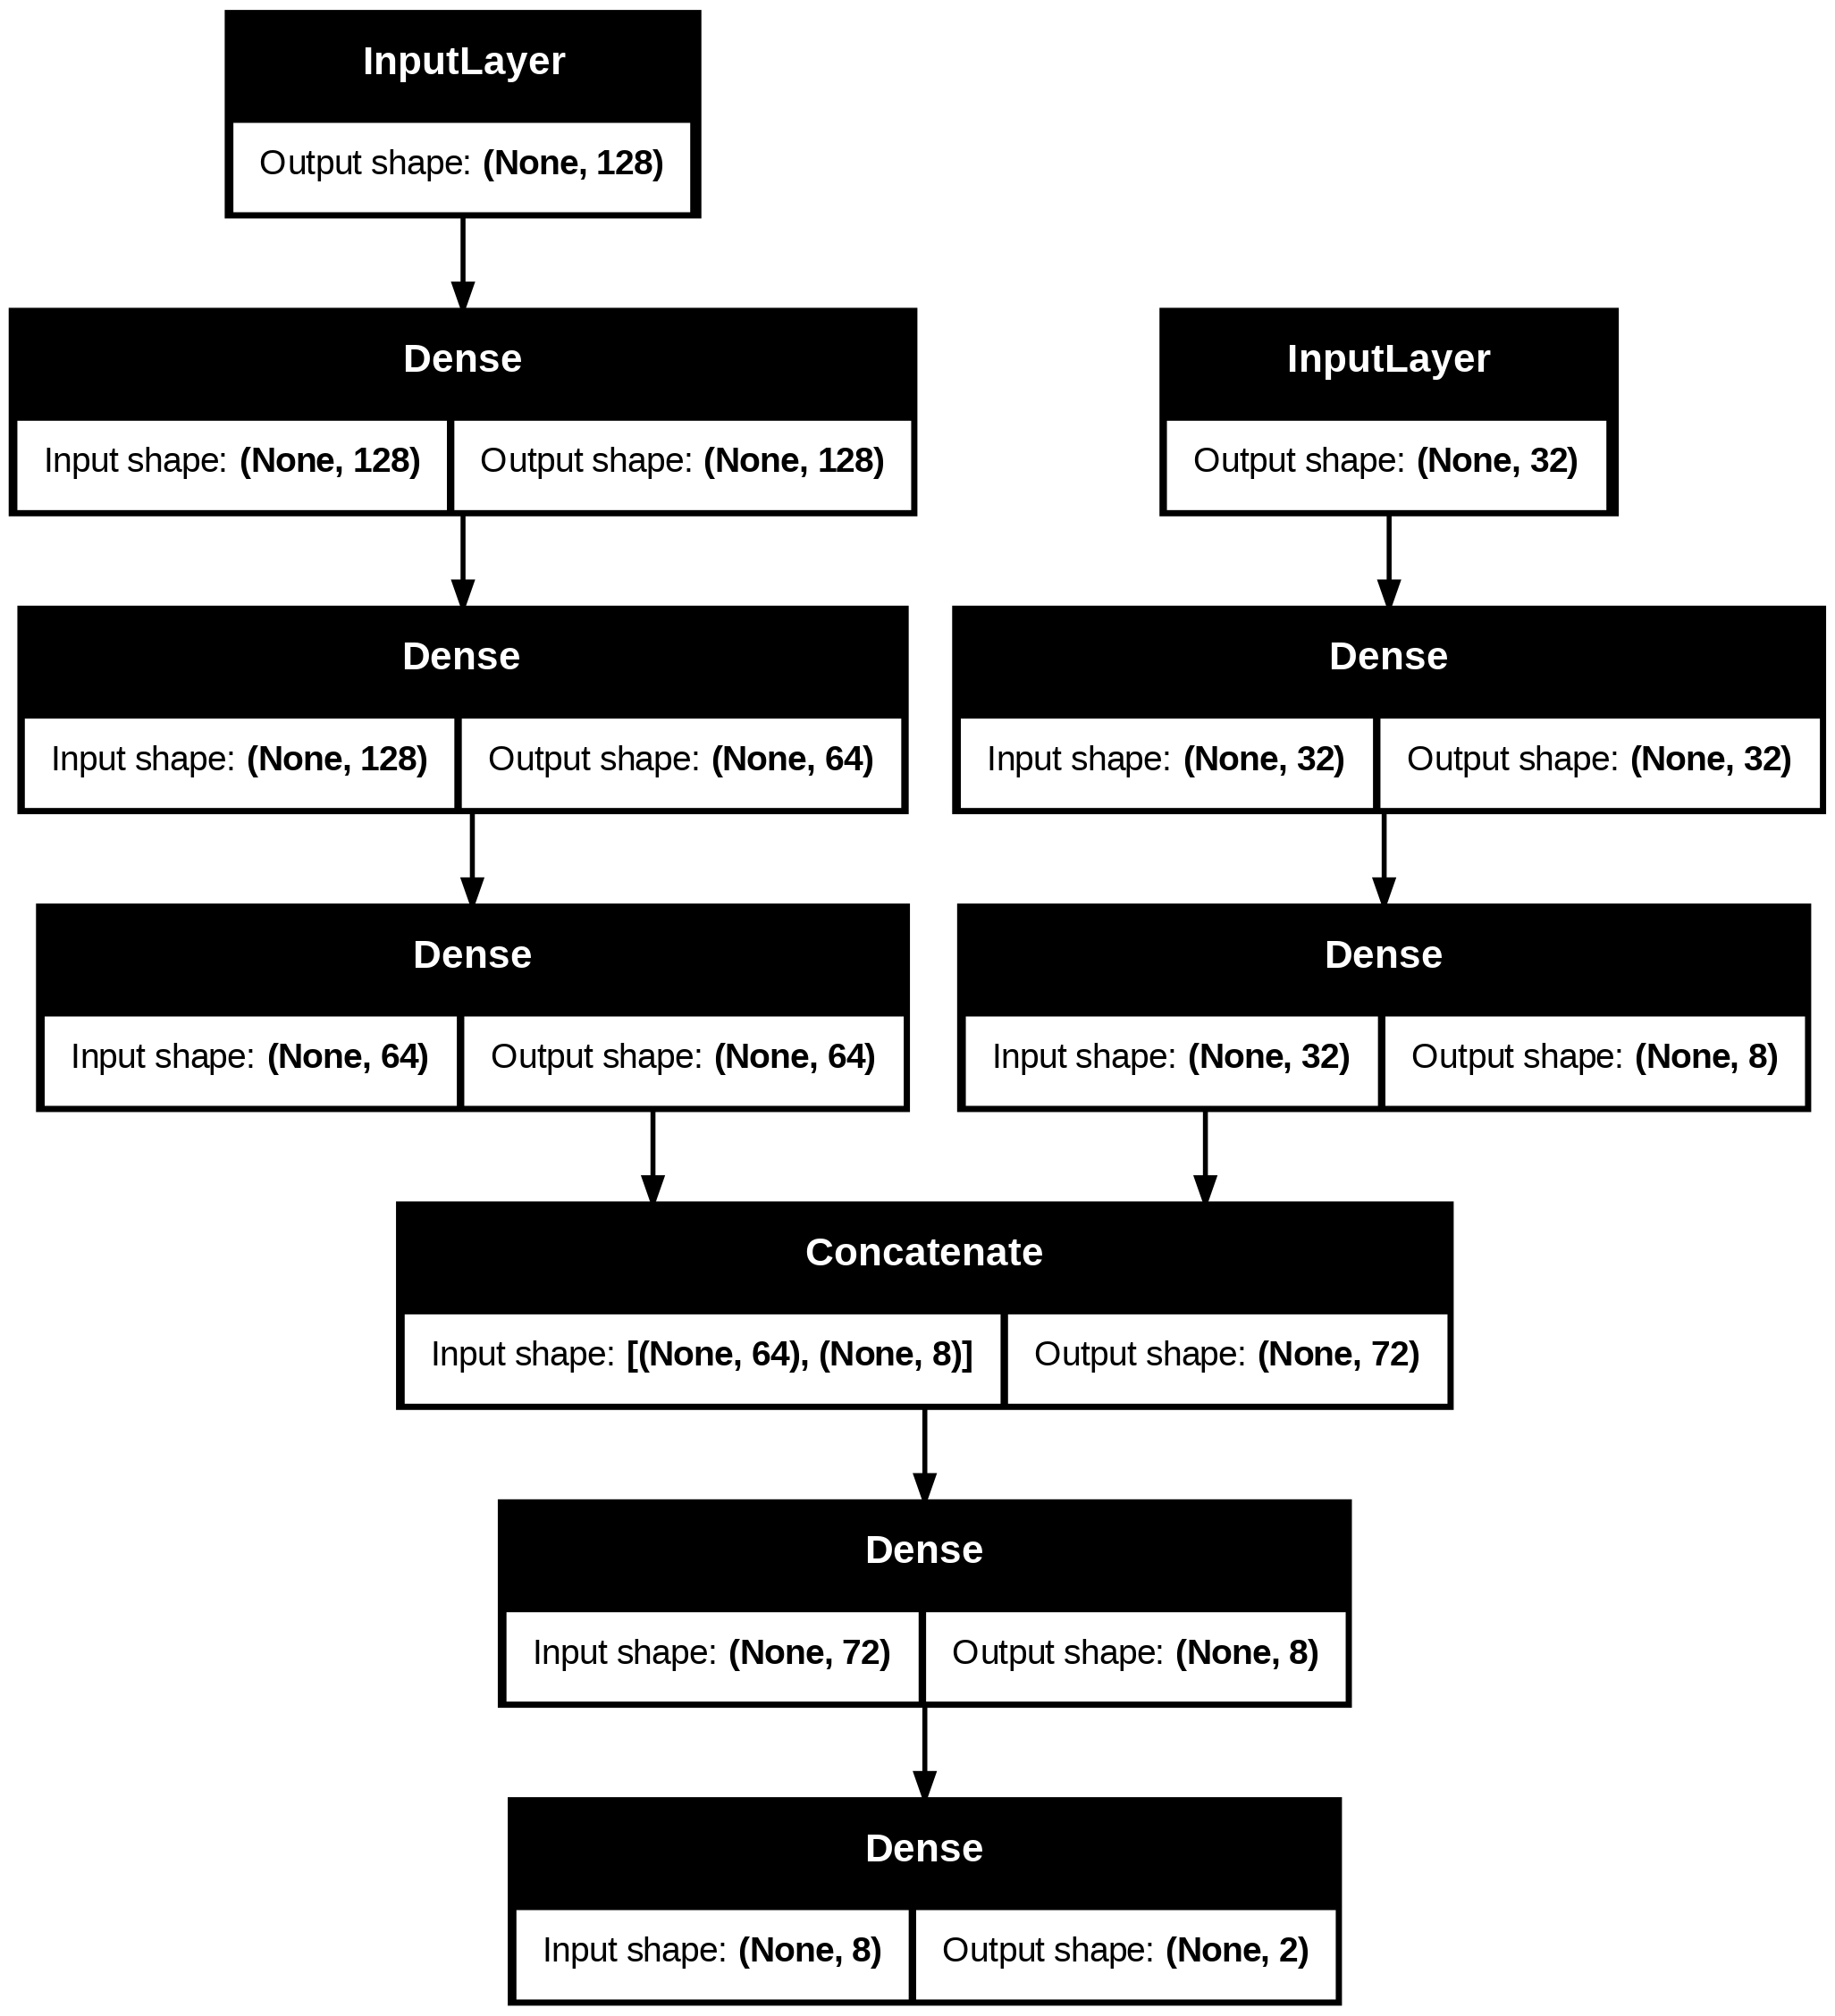

In [16]:
plot_model(m2,show_shapes=True)

# Age Gender Prediction Function API

In [17]:
!mkdir -p /.kaggle
!cp kaggle.json /.kaggle/

In [19]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
100% 330M/331M [00:15<00:00, 23.7MB/s]
100% 331M/331M [00:15<00:00, 22.3MB/s]


In [20]:
import zipfile

zip = zipfile.ZipFile('utkface-new.zip','r')
zip.extractall('/content')
zip.close()

In [24]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
path = '/content/utkface_aligned_cropped/UTKFace'

In [29]:
age=[]
gender=[]
img_path=[]
for file in os.listdir(path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  img_path.append(file)

In [30]:
len(age)

23708

In [31]:
df = pd.DataFrame({'age':age,'gender':gender,'img':img_path})

In [33]:
df.shape

(23708, 3)

In [32]:
df.head()

,age,gender,img
0,90,1,90_1_2_20170111205444634.jpg.chip.jpg
1,50,0,50_0_0_20170117130056489.jpg.chip.jpg
2,45,0,45_0_2_20170117183529862.jpg.chip.jpg
3,24,0,24_0_2_20170117141025894.jpg.chip.jpg
4,30,1,30_1_1_20170112235107208.jpg.chip.jpg


In [34]:
train_df = df.sample(frac=1,random_state=0).iloc[:20000]
test_df = df.sample(frac=1,random_state=0).iloc[20000:]

In [35]:
train_df.shape

(20000, 3)

In [37]:
test_df.shape

(3708, 3)

In [66]:
train_generator =ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_generator = ImageDataGenerator(rescale=1.0/255)

In [67]:
train_gnet = train_generator.flow_from_dataframe(train_df,
                                                    directory=path,
                                                    x_col='img',
                                                    y_col=['age','gender'],
                                                    target_size=(200,200),
                                                    class_mode='multi_output')
test_gnet = test_generator.flow_from_dataframe(test_df,
                                                    directory=path,
                                                    x_col='img',
                                                    y_col=['age','gender'],
                                                    target_size=(200,200),
                                                  class_mode='multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [43]:
from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.models import Model
import tensorflow as tf

In [44]:
conv_base = ResNet50(weights='imagenet',input_shape=(200,200,3), include_top=False)
conv_base.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [51]:
con_out = conv_base.layers[-1].output
flatten = Flatten()(con_out)

den1 = Dense(512,activation='relu')(flatten)
den2 = Dense(512,activation='relu')(flatten)

den3 = Dense(512,activation='relu')(den1)
den4 = Dense(512,activation='relu')(den2)

output1 = Dense(1,activation='linear',name='age')(den3)
output2 = Dense(1,activation='sigmoid',name='gender')(den4)

In [52]:
m3 = Model(inputs=conv_base.input,outputs=[output1,output2])

In [54]:
m3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 206, 206, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 100, 100, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 100, 100, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 100, 100, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 102, 102, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 50, 50, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 50, 50, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 50, 50, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 50, 50, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 50, 50, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 126,875,522 (483.99 MB)

 Trainable params: 103,287,810 (394.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [55]:
m3.compile(optimizer='adam',loss={'age':'mae','gender':'binary_crossentropy'},
           metrics={'age':'mae','gender':'accuracy'},loss_weights={'age':1,'gender':99})

In [70]:
def fix_generator(generator):
    for x, y in generator:
        yield x, tuple(y)

In [ ]:
hist3 = m3.fit(fix_generator(train_gnet), epochs=5, validation_data= fix_generator(test_gnet), batch_size=32)

Epoch 1/5
   2483/Unknown 833s 330ms/step - age_loss: 15.4739 - age_mae: 15.4739 - gender_accuracy: 0.5194 - gender_loss: 97.6653 - loss: 113.1393